## Problem Statement

*An oil spill is the release of a liquid petroleum hydrocarbon into the environment, especially the marine ecosystem, due to the human ecosystem, and is a form of pollution. Where the oil is spilled, what kinds of plants, animals, and habitats are found there, and the amount and type of oil, among other things, amount and type of oil, among other things, can influence how much harm an oil spill causes. So far no solution can identify the causes of these oil spills and try to reduce them.*


*The aim of this notebook is to show how a few lines of code in python using Pandas, NumPy and Matplotlib help perform statistical analysis on a dataset with apparently minimal information.*

*The data are sourced from: https://www.kaggle.com/datasets/usdot/pipeline-accidents/data

## Importing the Required Libraries

In [1]:
#For reading and manipulating the data
import pandas as pd 
import numpy as np 
from pandas import Series,DataFrame

#for visualization
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style('whitegrid')
%matplotlib inline 

import plotly
import plotly.offline as py
import plotly.express as px
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

!pip install plotly pandas

## Importing the Data 

In [2]:
spill = pd.read_csv("database.csv") 

In [3]:
#looking at initial records in dataset
spill.head()

Report Number  Supplemental Number  Accident Year Accident Date/Time  \
0       20100016                17305           2010   1/1/2010 7:15 AM   
1       20100254                17331           2010   1/4/2010 8:30 AM   
2       20100038                17747           2010  1/5/2010 10:30 AM   
3       20100260                18574           2010   1/6/2010 7:30 PM   
4       20100030                16276           2010   1/7/2010 1:00 PM   

   Operator ID                         Operator Name Pipeline/Facility Name  \
0        32109                 ONEOK NGL PIPELINE LP      KINDER MORGAN JCT   
1        15786                PORTLAND PIPELINE CORP      24-INCH MAIN LINE   
2        20160           PETROLOGISTICS OLEFINS, LLC                    NaN   
3        11169  ENBRIDGE ENERGY, LIMITED PARTNERSHIP      SUPERIOR TERMINAL   
4          300                 PLAINS PIPELINE, L.P.         RED RIVER EAST   

  Pipeline Location Pipeline Type                                 Liquid Type  \
0           ONSHORE   ABOVEGROUND  HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS   
1           ONSHORE   ABOVEGROUND                                   CRUDE OIL   
2           ONSHORE   ABOVEGROUND  HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS   
3           ONSHORE   UNDERGROUND                                   CRUDE OIL   
4           ONSHORE   UNDERGROUND                                   CRUDE OIL   

   ... Other Fatalities Public Fatalities All Fatalities  \
0  ...              NaN               NaN            NaN   
1  ...              NaN               NaN            NaN   
2  ...              NaN               NaN            NaN   
3  ...              NaN               NaN            NaN   
4  ...              NaN               NaN            NaN   

  Property Damage Costs Lost Commodity Costs  \
0                 110.0               1517.0   
1                4000.0                  8.0   
2                   0.0                200.0   
3                 200.0                 40.0   
4               20000.0                150.0   

   Public/Private Property Damage Costs  Emergency Response Costs  \
0                                   0.0                       0.0   
1                                   0.0                       0.0   
2                                   0.0                       0.0   
3                                   0.0                   11300.0   
4                                   0.0                    7500.0   

  Environmental Remediation Costs Other Costs  All Costs  
0                             0.0         0.0       1627  
1                             0.0         0.0       4008  
2                             0.0         0.0        200  
3                             0.0         0.0      11540  
4                          2000.0         0.0      29650  

[5 rows x 48 columns]

### Exploring the Dataset 

In [4]:
#shaping of the dataframe
spill.shape

(2795, 48)

In [5]:
#getting more info on the dataset

spill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795 entries, 0 to 2794
Data columns (total 48 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Report Number                         2795 non-null   int64  
 1   Supplemental Number                   2795 non-null   int64  
 2   Accident Year                         2795 non-null   int64  
 3   Accident Date/Time                    2795 non-null   object 
 4   Operator ID                           2795 non-null   int64  
 5   Operator Name                         2795 non-null   object 
 6   Pipeline/Facility Name                2674 non-null   object 
 7   Pipeline Location                     2795 non-null   object 
 8   Pipeline Type                         2777 non-null   object 
 9   Liquid Type                           2795 non-null   object 
 10  Liquid Subtype                        1349 non-null   object 
 11  Liquid Name      

### First lets clean up the data.

Since i dont want to completely drop the rows with NaN, i just put the NaN with the value of 0.

<Axes: >

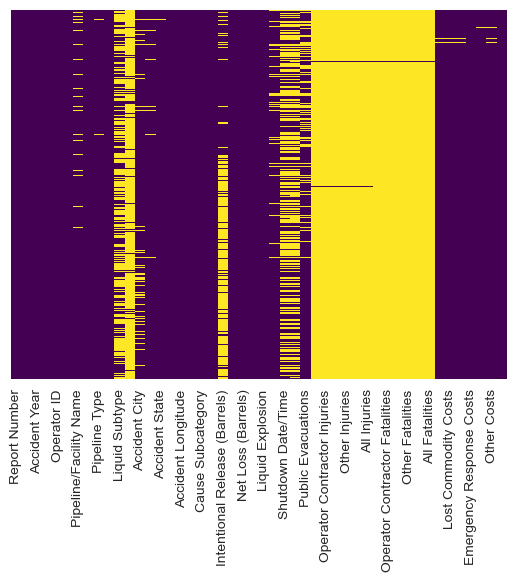

In [6]:
sns.heatmap(spill.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
#First i decided to just drop all the columns with data i will also drop some columns that we dont need.

cl_spill = spill.drop(['Operator Contractor Injuries',
                  'Other Injuries',
                  'Emergency Responder Injuries',
                  'Operator Contractor Fatalities',
                  'Public Injuries',
                  'Emergency Responder Fatalities',
                  'Public Fatalities',
                  'Report Number',
                  'Operator ID',
                   'Operator Employee Fatalities',
                   'Other Fatalities',
                   'Operator Employee Injuries'],axis=1)

<Axes: >

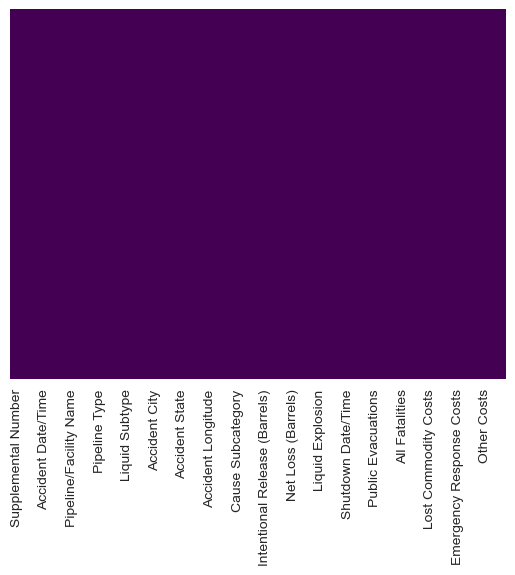

In [8]:
#Filling in all the NaN with values of 0, because i want to keep the columns. Checking if there is still any missing data.

fill_spill = cl_spill.fillna(0.00)
sns.heatmap(fill_spill.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
fill_spill.head()

Supplemental Number  Accident Year Accident Date/Time  \
0                17305           2010   1/1/2010 7:15 AM   
1                17331           2010   1/4/2010 8:30 AM   
2                17747           2010  1/5/2010 10:30 AM   
3                18574           2010   1/6/2010 7:30 PM   
4                16276           2010   1/7/2010 1:00 PM   

                          Operator Name Pipeline/Facility Name  \
0                 ONEOK NGL PIPELINE LP      KINDER MORGAN JCT   
1                PORTLAND PIPELINE CORP      24-INCH MAIN LINE   
2           PETROLOGISTICS OLEFINS, LLC                    0.0   
3  ENBRIDGE ENERGY, LIMITED PARTNERSHIP      SUPERIOR TERMINAL   
4                 PLAINS PIPELINE, L.P.         RED RIVER EAST   

  Pipeline Location Pipeline Type                                 Liquid Type  \
0           ONSHORE   ABOVEGROUND  HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS   
1           ONSHORE   ABOVEGROUND                                   CRUDE OIL   
2           ONSHORE   ABOVEGROUND  HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS   
3           ONSHORE   UNDERGROUND                                   CRUDE OIL   
4           ONSHORE   UNDERGROUND                                   CRUDE OIL   

                                      Liquid Subtype Liquid Name  ...  \
0  LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL G...         0.0  ...   
1                                                0.0         0.0  ...   
2                                          OTHER HVL      ETHANE  ...   
3                                                0.0         0.0  ...   
4                                                0.0         0.0  ...   

  Public Evacuations All Injuries All Fatalities  Property Damage Costs  \
0                0.0          0.0            0.0                  110.0   
1                0.0          0.0            0.0                 4000.0   
2                0.0          0.0            0.0                    0.0   
3                0.0          0.0            0.0                  200.0   
4                0.0          0.0            0.0                20000.0   

   Lost Commodity Costs Public/Private Property Damage Costs  \
0                1517.0                                  0.0   
1                   8.0                                  0.0   
2                 200.0                                  0.0   
3                  40.0                                  0.0   
4                 150.0                                  0.0   

  Emergency Response Costs  Environmental Remediation Costs  Other Costs  \
0                      0.0                              0.0          0.0   
1                      0.0                              0.0          0.0   
2                      0.0                              0.0          0.0   
3                  11300.0                              0.0          0.0   
4                   7500.0                           2000.0          0.0   

   All Costs  
0       1627  
1       4008  
2        200  
3      11540  
4      29650  

[5 rows x 36 columns]

### Data Visualization

### Main Cause of Oil Spillage

In [10]:
main_causes = fill_spill['Cause Category'].value_counts()
main_causes = go.Bar(
   y = main_causes.values, 
   x = main_causes.index.values, 
   name = 'Causes Category Count', 
     marker=dict(
        color=main_causes.values,
        colorscale = 'Viridis',
        reversescale = True
        )

)

data = [main_causes]

layout = go.Layout (
title = 'Cause of Oil Spillage', 
width = 800, 
margin=go.Margin(b=140, r= 180)
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


C:\Users\Faza\anaconda3\Lib\site-packages\plotly\graph_objs\_deprecations.py:405: DeprecationWarning:

plotly.graph_objs.Margin is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Margin




**We can see that the main causes of Material/Weld/Equipment Failure, let's break it down further**

In [11]:
main_causes_sub = fill_spill['Cause Subcategory'].value_counts()
main_causes_sub = go.Bar(
   y = main_causes_sub.values, 
   x = main_causes_sub.index.values, 
   name = 'Causes Subcategory Count', 
     marker=dict(
        color=main_causes_sub.values,
        colorscale = 'Viridis',
        reversescale = True
        )
    
)

data = [main_causes_sub]


layout = go.Layout (
title = 'Cause Sub Category', 
height= 1000,
width = 1200, 
margin=go.Margin(b=10, r=150)
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='basic-bar')

C:\Users\Faza\anaconda3\Lib\site-packages\plotly\graph_objs\_deprecations.py:405: DeprecationWarning:

plotly.graph_objs.Margin is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Margin




Where is the most common place of pipeline accidents?

In [12]:
fill_spill['Pipeline Type'].value_counts().head(5)

ABOVEGROUND        1475
UNDERGROUND         985
TANK                301
0.0                  18
TRANSITION AREA      16
Name: Pipeline Type, dtype: int64

**The most common place for accidents is by far Above Ground, followed by Under Ground from below countplot**

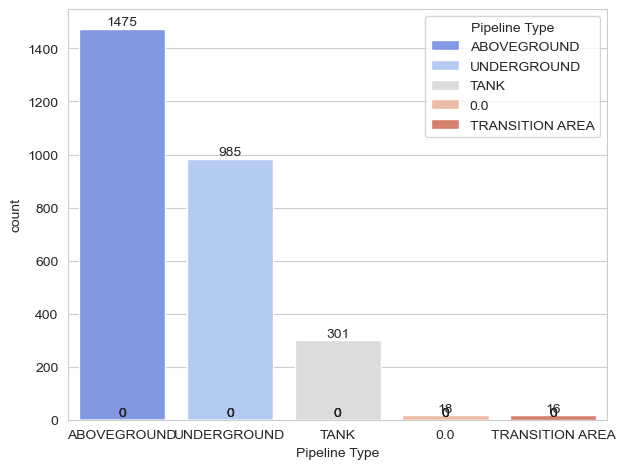

In [13]:
# Create the barplot
sns.countplot(
    x="Pipeline Type",
    data=fill_spill,
    hue="Pipeline Type",
    palette="coolwarm",
    dodge=False,
    order=fill_spill["Pipeline Type"].value_counts().index,
)

# Add numbers above the bars
for bar in plt.gca().patches:
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    y = height + 1

    plt.text(x, y, str(int(height)), ha="center", va="bottom")

plt.tight_layout()
plt.show()

**Are offshore or onshore pipeline the more vunerable to oil spill?**

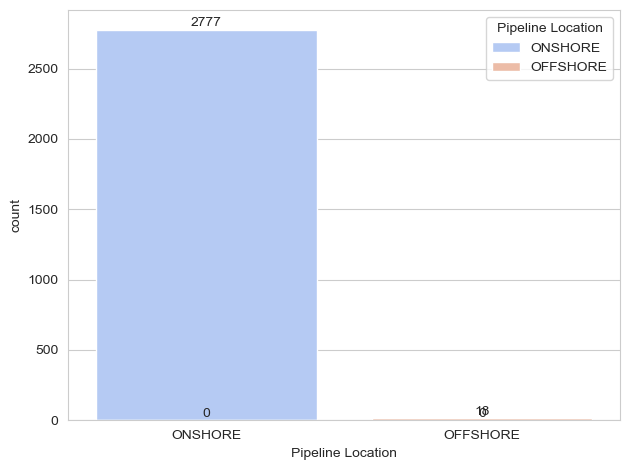

In [14]:
sns.countplot(x='Pipeline Location',data=fill_spill,hue='Pipeline Location',palette='coolwarm',
             dodge=False,order = fill_spill['Pipeline Location'].value_counts().index)

# Add numbers above the bars
for bar in plt.gca().patches:
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    y = height + 1

    plt.text(x, y, str(int(height)), ha="center", va="bottom")
    
plt.tight_layout()
plt.show()

**Next I want to to know which categories are related to one another from a heatmap**

C:\Users\Faza\AppData\Local\Temp\ipykernel_28488\1971125290.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

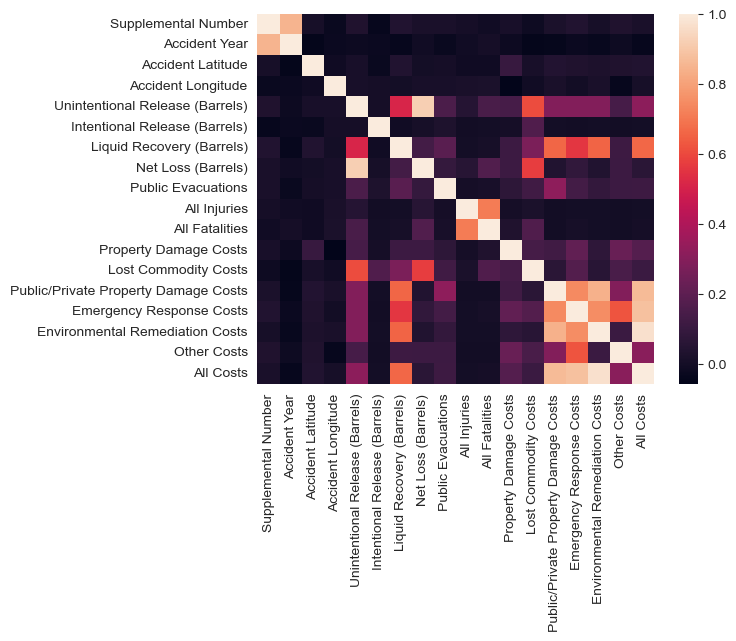

In [15]:
sns.heatmap(fill_spill.corr())

**I want to explore the right bottom categories, which are related to costs, which cost is most contributed to All Costs?**

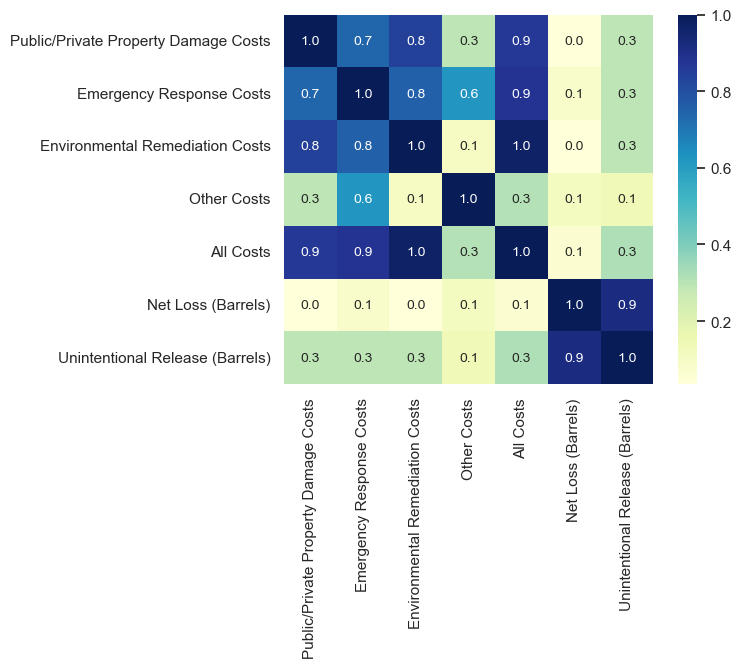

In [16]:
g = ['Public/Private Property Damage Costs',
     'Emergency Response Costs',
     'Environmental Remediation Costs',
     'Other Costs',
     'All Costs',
     'Net Loss (Barrels)',
     'Unintentional Release (Barrels)']
t = np.corrcoef(fill_spill[g].values.T)
sns.set(font_scale = 1.0)
map = sns.heatmap(t,
                  cbar = True,
                  cmap="YlGnBu",
                  annot = True, 
                  square= True,
                  fmt = '.1f',
                  annot_kws = {'size':10}, 
                 yticklabels = g,
                 xticklabels = g)

**I want to explore which year has the most accidents and the trend of safety**

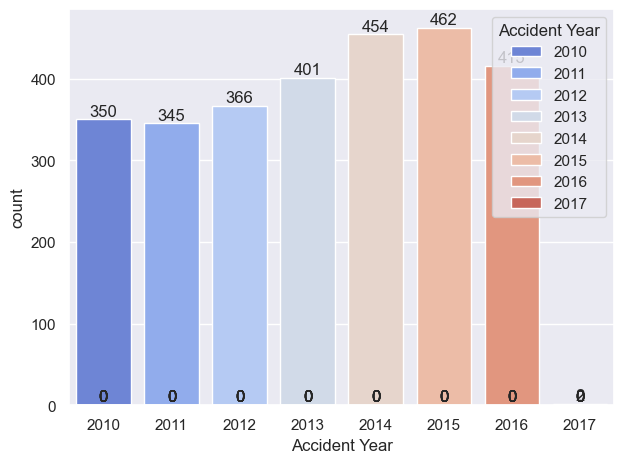

In [17]:
sns.countplot(x='Accident Year',data=fill_spill,hue='Accident Year',palette='coolwarm',
             dodge=False)

# Add numbers above the bars
for bar in plt.gca().patches:
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    y = height + 1

    plt.text(x, y, str(int(height)), ha="center", va="bottom")

plt.tight_layout()
plt.show()

### Plotting more visualization for better understanding

In [48]:
df_byCost = fill_spill.sort_values(by=['All Costs'], ascending=False)
info = ['Accident Year','Accident Date/Time','All Costs','Operator Name','Accident City', 'Accident State', 'Cause Category'
       ,'Cause Subcategory','Public/Private Property Damage Costs',
     'Emergency Response Costs',
     'Environmental Remediation Costs',
     'Other Costs',
     'All Costs',
     'Net Loss (Barrels)',
     'Unintentional Release (Barrels)']
df_byCost[info].head()

Accident Year  Accident Date/Time  All Costs  \
194            2010   7/25/2010 5:58 PM  840526118   
2103           2015  5/19/2015 10:57 AM  142931884   
523            2011   7/1/2011 10:40 PM  135000000   
1173           2013   3/29/2013 2:37 PM   91300000   
2675           2016   9/9/2016 11:10 AM   66234072   

                             Operator Name Accident City Accident State  \
194   ENBRIDGE ENERGY, LIMITED PARTNERSHIP      MARSHALL             MI   
2103                 PLAINS PIPELINE, L.P.        GOLETA             CA   
523                 EXXONMOBIL PIPELINE CO        LAUREL             MT   
1173             MOBIL  PIPE  LINE COMPANY     MAYFLOWER             AR   
2675                  COLONIAL PIPELINE CO        HELENA             AL   

                   Cause Category               Cause Subcategory  \
194   MATERIAL/WELD/EQUIP FAILURE  ENVIRONMENTAL CRACKING-RELATED   
2103                    CORROSION                        EXTERNAL   
523          NATURAL FORCE DAMAGE              HEAVY RAINS/FLOODS   
1173  MATERIAL/WELD/EQUIP FAILURE           MANUFACTURING-RELATED   
2675             ALL OTHER CAUSES                         UNKNOWN   

      Public/Private Property Damage Costs  Emergency Response Costs  \
194                             23000000.0               177000000.0   
2103                                   0.0                90701042.0   
523                              7500000.0               100000000.0   
1173                                   0.0                64700000.0   
2675                                   0.0                64000000.0   

      Environmental Remediation Costs  Other Costs  All Costs  \
194                       635000000.0    2400000.0  840526118   
2103                       22421933.0   19796736.0  142931884   
523                               0.0   22350000.0  135000000   
1173                       20100000.0    5300000.0   91300000   
2675                              0.0          0.0   66234072   

      Net Loss (Barrels)  Unintentional Release (Barrels)  
194               1837.0                          20082.0  
2103              1834.0                           2934.0  
523               1509.0                           1509.0  
1173              1090.0                           3190.0  
2675              5259.0                           7370.0

<Figure size 1100x800 with 0 Axes>

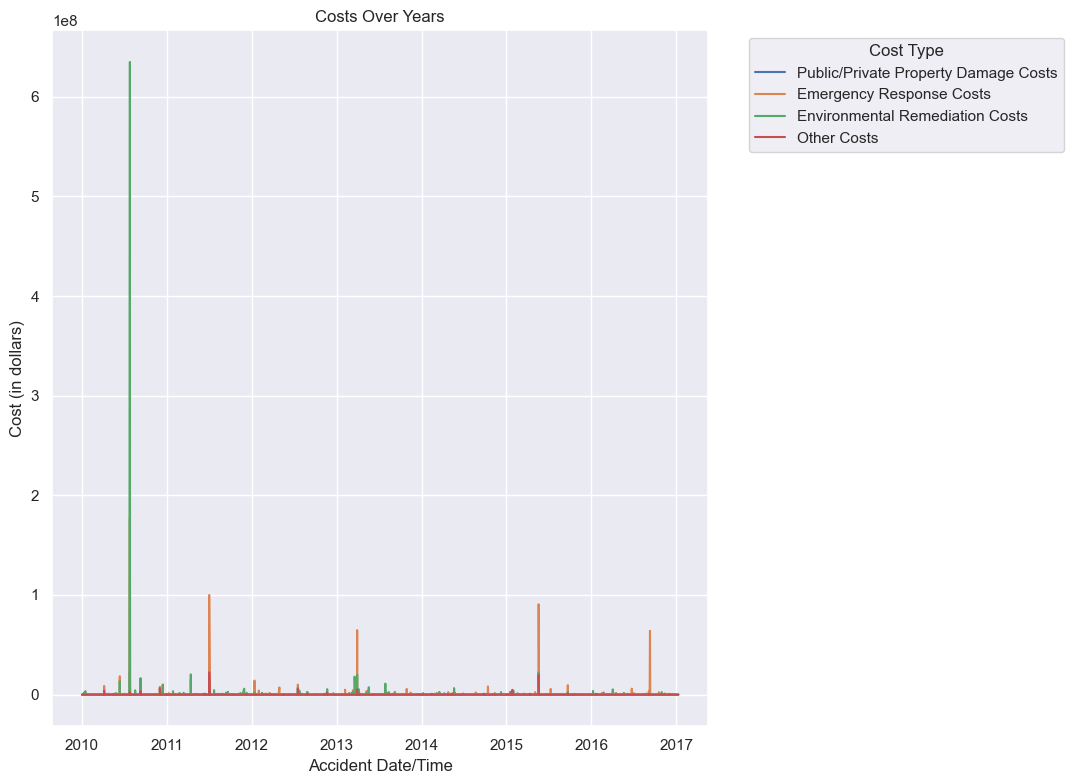

In [68]:
plt.figure(figsize=(11, 8))

# Select the relevant columns for the plot
cost_columns = [
    'Public/Private Property Damage Costs',
    'Emergency Response Costs',
    'Environmental Remediation Costs',
    'Other Costs',
]

# Melt the DataFrame to long format for easier plotting
df_melted = pd.melt(fill_spill, id_vars=['Accident Date/Time'], value_vars=cost_columns,
                    var_name='Cost Type', value_name='Cost')

# Create a line plot
sns.lineplot(x='Accident Date/Time', y='Cost', hue='Cost Type', data=df_melted, errorbar=None)

plt.xlabel('Accident Date/Time')
plt.ylabel('Cost (in dollars)')
plt.title('Costs Over Years')
plt.legend(title='Cost Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [72]:
cost_columns = [
    'Public/Private Property Damage Costs',
    'Emergency Response Costs',
    'Environmental Remediation Costs',
    'Other Costs',
]

# Melt the DataFrame to long format for easier plotting
df_melted = pd.melt(fill_spill, id_vars=['Accident Date/Time', 'Operator Name'], value_vars=cost_columns,
                    var_name='Cost Type', value_name='Cost')

# Create a line plot using plotly express
fig = px.line(df_melted, x='Accident Date/Time', y='Cost', color='Cost Type',
              title='Costs Over Years',
              hover_data={'Operator Name': True})  # Include 'Operator Name' in hover information

# Customize the layout
fig.update_layout(xaxis_title='Accident Date/Time', yaxis_title='Cost (in dollars)',
                  legend_title='Cost Type', autosize=True)

# Show the interactive plot
fig.show()

### Most Frequent Oil Spillers

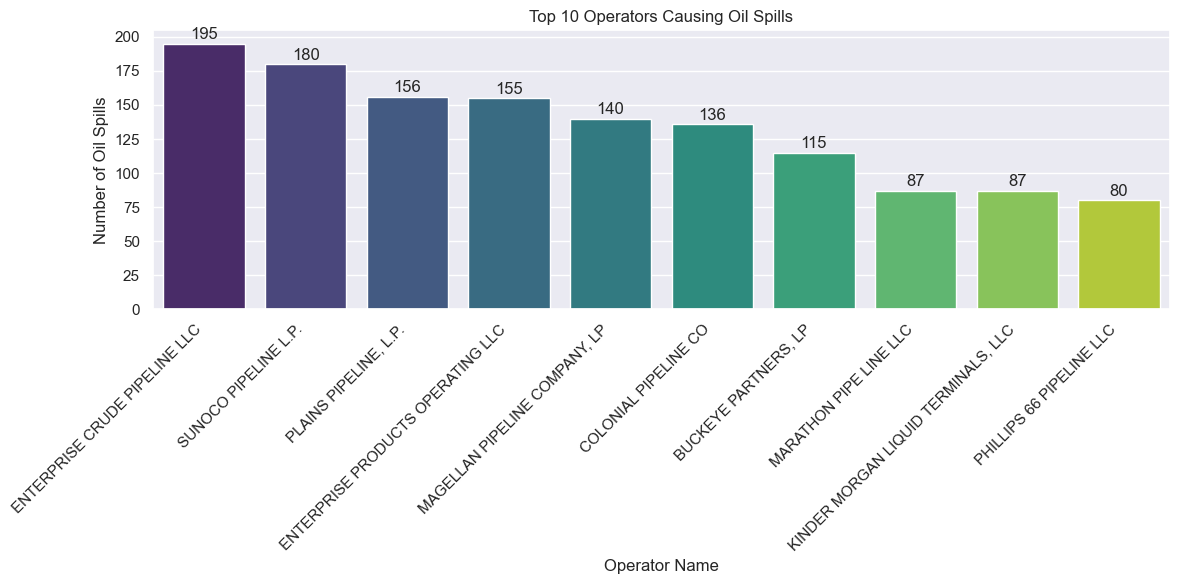

In [24]:
operator_spills = fill_spill['Operator Name'].value_counts().reset_index()
operator_spills.columns = ['Operator Name', 'Number of Spills']

# Sort the data by the number of spills in descending order
operator_spills = operator_spills.sort_values(by='Number of Spills', ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Operator Name', y='Number of Spills', data=operator_spills[:10], palette='viridis')
plt.xlabel('Operator Name')
plt.ylabel('Number of Oil Spills')
plt.title('Top 10 Operators Causing Oil Spills')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add numbers above the bars
for bar in plt.gca().patches:
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    y = height + 1

    plt.text(x, y, str(int(height)), ha="center", va="bottom")

# Show the plot
plt.show()

**Lastly, i want to know the correlation between All Costs to Net Loss Barrels of Oil**

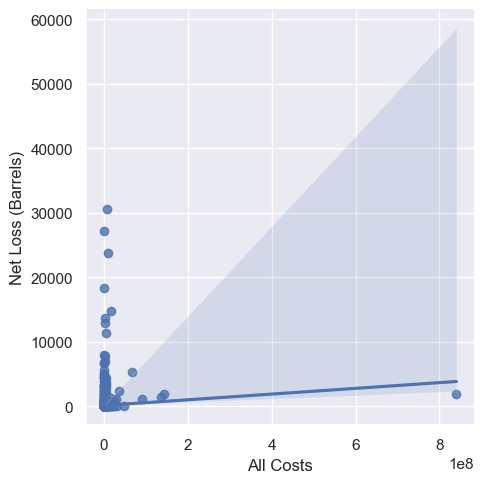

In [73]:
sns.lmplot(x='All Costs',y='Net Loss (Barrels)',data=fill_spill)

## Conclusion

*With the help of data analysis we can better understand the reasons for oil spill and reduce it by take the the proper measures. We found out from the visualization that:
1. Equipment failure is the main reason for the oil spillage.
2. Above Ground pipeline is more vunerable to oil spillage.
3. The biggest contributor to 'All Costs' is Environmental Remediation Cost, based on correlation heat map.
4. The data also gave use insight that "Teppco Crude Pipeline" is the biggest oil spiller. 
5. We compared the Net Loss with All Costs to better understand the question, "how much are we losing?".
6. There is rising trend of accidents rate from 2010 to 2016. This is a major concern of safety & environmental issue.

Such analysis of the data not only helps us understand our situation better better also helps use to prepare with proper precaution for the future*